In [1]:
!pip install gymnasium

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from gymnasium import Env, spaces, register, make
import random


In [3]:
# Random-Maze Environment
#Random-Maze Environment Implementation

class RMEnv(Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 4}

    def __init__(self, render_mode=None):

        self.P = {
            0: {
                0: [(0.9, 0, -0.04, False),(0.1, 1, -0.04, False)],
                1: [(0.8, 1, -0.04, False),(0.1, 4, -0.04, False),(0.1, 0, -0.04, False)],
                2: [(0.8, 4, -0.04, False),(0.1, 1, -0.04, False),(0.1, 0, -0.04, False)],
                3: [(0.9, 0, -0.04, False),(0.1, 4, -0.04, False)]

            },
            1: {
                0: [(0.8, 1, -0.04, False),(0.1, 0, -0.04, False),(0.1, 2, -0.04, False)],
                1: [(0.8, 2, -0.04, False),(0.2, 1, -0.04, False)],
                2: [(0.8, 1, -0.04, False),(0.1, 0, -0.04, False),(0.1, 2, -0.04, False)],
                3: [(0.8, 0, -0.04, False),(0.2, 1, -0.04, False)]

            },
            2: {
                0: [(0.8, 2, -0.04, False),(0.1, 3, 1, True),(0.1, 1, -0.04, False)],
                1: [(0.8, 3, 1, True),(0.1, 2, -0.04, False),(0.1, 6, -0.04, False)],
                2: [(0.8, 6, -0.04, False),(0.1, 1, -0.04, False),(0.1, 3, 1, True)],
                3: [(0.8, 1, -0.04, False),(0.1, 2, -0.04, False),(0.1, 6, -0.04, False)]

            },
            3: {
                0: [(1.0, 3, 0, True)],
                1: [(1.0, 3, 0, True)],
                2: [(1.0, 3, 0, True)],
                3: [(1.0, 3, 0, True)]

            },
            4: {
                0: [(0.8, 0, -0.04, False),(0.2, 4, -0.04, False)],
                1: [(0.8, 4, -0.04, False),(0.1, 0, -0.04, False),(0.1, 8, -0.04, False)],
                2: [(0.8, 8, -0.04, False),(0.2, 4, -0.04, False)],
                3: [(0.8, 4, -0.04, False),(0.1, 0, -0.04, False),(0.1, 8, -0.04, False)]

            },
            5: {
                0: [(0.0, 5, 0, False)],
                1: [(0.0, 5, 0, False)],
                2: [(0.0, 5, 0, False)],
                3: [(0.0, 5, 0, False)]

            },

            6: {
                0: [(0.8, 2, -0.04, False),(0.1, 7, -1, True),(0.1, 6, -0.04, False)],
                1: [(0.8, 7, -1, True),(0.1, 2, -0.04, False),(0.1, 10, -0.04, False)],
                2: [(0.8, 10, -0.04, False),(0.1, 7, -1, True),(0.1, 6, -0.04, False)],
                3: [(0.8, 6, -0.04, False),(0.1, 2, -0.04, False),(0.1, 10, -0.04, False)]

            },
            7: {
                0: [(1.0, 7, 0, True)],
                1: [(1.0, 7, 0, True)],
                2: [(1.0, 7, 0, True)],
                3: [(1.0, 7, 0, True)]

            },
            8: {
                0: [(0.8, 4, -0.04, False),(0.1, 9, -0.04, False),(0.1, 8, -0.04, False)],
                1: [(0.8, 9, -0.04, False),(0.1, 4, -0.04, False),(0.1, 8, -0.04, False)],
                2: [(0.9, 8, -0.04, False),(0.1, 9, -0.04, False)],
                3: [(0.9, 8, -0.04, False),(0.1, 4, -0.04, False)]

            },
            9: {
              0: [(0.8, 9, -0.04, False),(0.1, 8, -0.04, False),(0.1, 10, -0.04, False)],
              1: [(0.8, 10, -0.04, False),(0.2, 9, -0.04, False)],
              2: [(0.8, 9, -0.04, False),(0.1, 10, -0.04, False),(0.1, 8, -0.04, False)],
              3: [(0.8, 8, -0.04, False),(0.2, 9, -0.04, False)]

            },
            10: {
              0: [(0.8, 6, -0.04, False),(0.1, 11, -0.04, False),(0.1, 9, -0.04, False)],
              1: [(0.8, 11, -0.04, False),(0.1, 6, -0.04, False),(0.1, 10, -0.04, False)],
              2: [(0.8, 10, -0.04, False),(0.1, 11, -0.04, False),(0.1, 9, -0.04, False)],
              3: [(0.8, 9, -0.04, False),(0.1, 10, -0.04, False),(0.1, 6, -0.04, False)]

            },
            11: {
                0: [(0.8, 7, -1, True),(0.1, 11, -0.04, False),(0.1, 10, -0.04, False)],
                1: [(0.9, 11, -0.04, False),(0.1, 7, -1, True)],
                2: [(0.9, 11, -0.04, False),(0.1, 10, -0.04, False)],
                3: [(0.8, 10, -0.04, False),(0.1, 11, -0.04, False),(0.1, 7, -1, True)]

            },
        }
        self.size = 12 # The size of the 1D grid

       #We have 3 observations, corresponding to each position in the 1-D grid
        self.observation_space = spaces.Discrete(self.size)

        #We have 2 actions, corresponding to "left" & "right"
        self.action_space = spaces.Discrete(4)

        assert render_mode is None or render_mode in self.metadata["render_modes"]
        self.render_mode = render_mode

        self.window = None
        self.clock = None

    def _get_obs(self):

        return self._agent_location


    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self._agent_location = 8
        self._target_location = 3
        self._dead_state = 7


        observation = self._get_obs()

        if self.render_mode == "human":
            self._render_frame()

        return observation


    def step(self, action):

        prev_location = self._agent_location
        transitions = self.P[prev_location][action]
        probabilities, next_states, rewards, termination = zip(*transitions)

        # Randomly select a transition based on the probabilities
        index = random.choices(range(len(probabilities)), weights=probabilities, k=1)[0]
        prob,self._agent_location, reward, terminated = probabilities[index],next_states[index], rewards[index], termination[index]

        observation = self._get_obs()
        truncated = False

        # "current_state": prev_location,"action":action,"next_state": self._agent_location,"reward":reward,"done":terminated
        tansition_info={"current_state": prev_location,
                       "action":action,
                        "next_state": self._agent_location,
                        "reward":reward,
                        "done":terminated}

        if self.render_mode == "human":
            self._render_frame()

        # Return the required 5-tuple
        return observation, reward, terminated,truncated,tansition_info

register(id='RMEnv', entry_point=RMEnv)

In [4]:
env1 = make('RMEnv', render_mode="rgb_array")

In [5]:
#1
#generate trajectory

def generateTrajectory(env, seed, pi, maxSteps):
  e=0
  trajectory = []
  observation= env.reset(seed=seed)
  s=observation
  for e in range(maxSteps):
    a=pi[s]
    s, reward, terminated,truncated,info = env.step(a)
    t = (info['current_state'], info['action'],  info['reward'], info['next_state'], info['done'])
    trajectory.append(t)
    if terminated:
      break
    elif e==maxSteps-1 :
      trajectory=[]
  return trajectory

In [6]:
pi=[0,1,2,3,0,1,2,4,0,1,2,3]

In [7]:
#implementing trajectory
T=generateTrajectory(env1, seed=30, pi=pi, maxSteps=10)
T


/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:189: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'int'>`
  logger.warn(


[]

In [8]:
T_2=generateTrajectory(env1, seed=30, pi=pi, maxSteps=10)
T_2

[]

In [9]:
#2
#function to decay the step size
def decayAlpha(initialValue, finalValue, maxSteps, decayType):
    alpha=initialValue
    alpha_l=[]
    if finalValue == 0:
        print("Error: Final value is zero.")
        return None
    if decayType=="linear":
        s_val=(initialValue-finalValue)/(maxSteps-1)
        for i in range(maxSteps):
            alpha_l.append(alpha)
            alpha=alpha-s_val
    if decayType=="exponential":
        s_val=(np.log(initialValue/finalValue))/maxSteps
        for i in range(maxSteps):
            alpha_l.append(alpha)
            alpha=alpha*(np.exp(-s_val))
        alpha_l[maxSteps-1]=finalValue
    return alpha_l

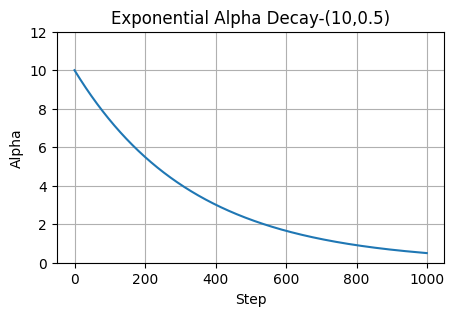

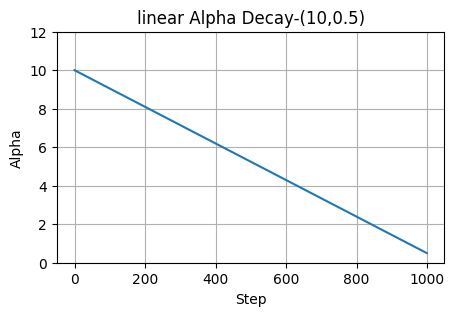

In [10]:
time_steps = np.arange(1000)
#exponential
alpha=decayAlpha(10, 0.5, 1000, decayType="exponential")
plt.figure(figsize=(5, 3))
plt.plot(time_steps, alpha)

plt.title('Exponential Alpha Decay-(10,0.5)')
plt.xlabel('Step')
plt.ylabel('Alpha')
plt.grid(True)

plt.ylim(0, 12)
plt.show()

#linear
alpha=decayAlpha(10, 0.5, 1000, decayType="linear")
plt.figure(figsize=(5, 3))
plt.plot(time_steps, alpha)

plt.title('linear Alpha Decay-(10,0.5)')
plt.xlabel('Step')
plt.ylabel('Alpha')
plt.grid(True)

plt.ylim(0, 12)
plt.show()

In [11]:
#3
#monte carlo estimation
def monteCarlo(env,seed,pi,gamma,initialValue, finalValue, maxSteps, decayType,numEps,FV):
    v=np.zeros(env.observation_space.n)
    v_r=np.zeros((numEps,env.observation_space.n))
    alpha=decayAlpha(initialValue, finalValue, numEps, decayType)
    j=0
    G=0
    G_r=np.zeros((numEps,env.observation_space.n))
    for e in range(numEps):
        G=0
        alp=alpha[e]
        t= generateTrajectory(env,seed, pi, maxSteps)
        visited=np.full(env.observation_space.n, False, dtype=bool)
        for i in range(len(t)):
            s,a,s_n,r,d=t[i]
            if visited[s] and FV:
                continue
            else:
                visited[s]=True
            j=i
            while j<len(t):
                g=(gamma**(j-i))*(t[j][3])
                G=G+g
                j=j+1
            v[s]=v[s]+alp*(G-v[s])
            G_r[e,s]=G
        v_r[e]=v
    return v_r ,G_r



In [12]:
v_mc,_=monteCarlo(env1,seed=39,pi=pi,gamma=0.99,initialValue=0.5, finalValue=0.02, maxSteps=15, decayType="exponential",numEps=10,FV=True)
v_mc

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ,

In [13]:
#4
#TD learning
def TemporalDifference(env,seed,pi,gamma,initialValue, finalValue,decayType, numEps):
    v=np.zeros(env.observation_space.n)
    v_r=np.zeros((numEps,env.observation_space.n))
    alpha=decayAlpha(initialValue, finalValue, numEps, decayType)
    G_r=np.zeros((numEps,env.observation_space.n))

    for e in range(numEps):
        alp=alpha[e]
        observation= env.reset(seed=seed)
        s=observation
        done=False
        while not done:
            a=pi[s]
            obs,r,done,trunc,info=env.step(a)
            s_n=obs
            td_target=r
            if not done:
                td_target=td_target+gamma*v[s_n]
            td_error=td_target-v[s]
            v[s]=v[s]+alp*td_error
            s=s_n
            G_r[e,s]=td_target
        v_r[e]=v
    return v_r,G_r


In [14]:
v_td,_=TemporalDifference(env1,seed=39,pi=pi,gamma=0.99,initialValue=0.5, finalValue=0.02,decayType="exponential", numEps=10)
v_td

array([[-0.47890222, -0.02      , -0.02      ,  0.        , -0.02      ,
         0.        , -0.02      ,  0.        , -0.02      , -0.13992959,
        -0.17409817, -0.56885102],
       [-0.391292  , -0.03442312, -0.03442312,  0.        , -0.1990616 ,
         0.        , -0.08970829,  0.        , -0.03442312, -0.35893743,
        -0.46320548, -0.6971189 ],
       [-0.32193444, -0.06017861, -0.05921441,  0.        , -0.25902982,
         0.        , -0.19709785,  0.        , -0.09532913, -1.20105168,
        -1.30237033, -1.11705075],
       [-0.2909322 , -0.06749695, -0.09270206,  0.        , -0.28377227,
         0.        , -0.41263884,  0.        , -0.13361359, -1.54049903,
        -1.61384733, -1.42965895],
       [-0.2699414 , -0.07636559, -0.14179427,  0.        , -0.28987766,
         0.        , -0.4936788 ,  0.        , -0.15945882, -1.54049903,
        -1.61384733, -1.42965895],
       [-0.28127006, -0.09382568, -0.18048905,  0.        , -0.29161409,
         0.        , -

In [15]:
#5

def NstepgenerateTrajectory(env, seed, pi, maxSteps):
  e=0
  trajectory = []
  observation= env.reset(seed=seed)
  s=observation
  for e in range(maxSteps):
    a=pi[s]
    s, reward, terminated,truncated,info = env.step(a)
    t = (info['current_state'], info['action'],  info['reward'], info['next_state'], info['done'])
    trajectory.append(t)
    if terminated:
      break
  return trajectory

#n-Step TD Learning algorithm
def NtdLearning(env,seed,pi,gamma,n,initialValue, finalValue,decayType,numEps):
    v=np.zeros(env.observation_space.n)
    v_r=np.zeros((numEps,env.observation_space.n))
    alpha=decayAlpha(initialValue, finalValue, numEps, decayType)
    j=0
    G=0
    G_r=np.zeros((numEps,env.observation_space.n))
    for e in range(numEps):
        G=0
        alp=alpha[e]
        t= NstepgenerateTrajectory(env,seed, pi, n)
        for i in range(len(t)):
            s,a,r,s_n,d=t[i]
            j=i
            while j<len(t):
                g=(gamma**(j-i))*(t[j][3])
                G=G+g
                j=j+1
            v[s]=v[s]+alp*(G-v[s])
            G_r[e,s]=G
        v_r[e]=v
    return v_r ,G_r



In [16]:
v_ntd,_=NtdLearning(env1,seed=39,pi=pi,gamma=0.99,n=10,initialValue=0.5, finalValue=0.02,decayType="exponential", numEps=10)
v_ntd

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         46.82409974, 388.16736705, 441.98910624, 264.41412543],
       [ 11.44758974,   0.        ,   0.        ,   0.        ,
          7.09770115,   0.        ,   0.        ,   0.        ,
         32.74014517, 388.16736705, 441.98910624, 264.41412543],
       [ 23.85319227,  21.17648403,  13.53095253,   0.        ,
          9.76372059,   0.        ,   0.        ,   0.        ,
         26.92254295, 388.16736705, 441.98910624, 264.41412543],
       [  7.66558126,  21.17648403,  13.53095253,   0.        ,
          8.66650765,   0.        ,   0.        ,   0.        ,
         22.55888403, 388.16736705, 441.98910624, 264.41412543],
       [ 55.19501008,  39.7525597 ,  35.35567503,   0.        ,
         20.99848033,   0.        ,  25.07135781,   0.        ,
         22.95602093, 388.16736705, 441.98910624, 264.41412543],
       [ 64.96408769,  77.59604934,

In [17]:
#6
#TD lambda prediction
def TDLambda(env,seed,pi,gamma,initialValue, finalValue,decayType,numEps,l):
  v=np.zeros(env.observation_space.n)
  v_r=np.zeros((numEps,env.observation_space.n))
  E=np.zeros(env.observation_space.n)
  alpha=decayAlpha(initialValue, finalValue, numEps, decayType)
  G_r=np.zeros((numEps,env.observation_space.n))
  for e in range(numEps):
    alp=alpha[e]
    s=env.reset(seed=seed)
    done=False
    while not done:
      a=pi[s]
      s_n,r,done,trunc,info=env.step(a)
      td_target=r
      if not done:
        td_target=td_target+gamma*v[s_n]
      td_error=td_target-v[s]
      E[s]=E[s]+1
      v=v+alp*td_error*E
      E=gamma*l*E
      s=s_n
      G_r[e,s]=td_target
    v_r[e]=v
  return v_r,G_r





In [18]:
v_ltd,_=TDLambda(env1,seed=30,pi=pi,gamma=0.99,initialValue=0.5, finalValue=0.02,decayType="exponential", numEps=10,l=0.5)
v_ltd

array([[-0.07503908, -0.03920951, -0.03880709,  0.        , -0.05967539,
         0.        , -0.03799412,  0.        , -0.03640265, -0.351515  ,
        -0.65864985, -0.62754538],
       [-0.22663788, -0.11995305, -0.17322005,  0.        , -0.11650384,
         0.        , -0.28112476,  0.        , -0.07315771, -0.81631305,
        -0.92238391, -0.92185944],
       [-0.29180571, -0.24641125, -0.34366521,  0.        , -0.19499257,
         0.        , -0.46827206,  0.        , -0.11098411, -1.21834949,
        -1.21588845, -1.11110337],
       [-0.47623526, -0.3245022 , -0.4499617 ,  0.        , -0.22738359,
         0.        , -0.62150938,  0.        , -0.15025338, -1.28636869,
        -1.4107262 , -1.17927997],
       [-0.39952952, -0.24768283, -0.24990618,  0.        , -0.25561822,
         0.        , -0.62150938,  0.        , -0.1800766 , -1.28636869,
        -1.42519637, -1.19404246],
       [-0.4146374 , -0.29826252, -0.34319515,  0.        , -0.27987844,
         0.        , -

In [19]:
#8
Seed=[64,40 ,70 ,42 ,52]
k=np.zeros((1000,12))

for s in Seed:
  #fvmc
  v1,f=monteCarlo(env1,seed=s,pi=pi,gamma=0.99,initialValue=0.5, finalValue=0.02, maxSteps=15, decayType="exponential",numEps=1000,FV=True)
  k=k+v1

k=k/5
k=np.transpose(k)


In [20]:
#9
Seed=[64,40 ,70 ,42 ,52]
l=np.zeros((1000,12))

for s in Seed:
  #evmc
  v1,h=monteCarlo(env1,seed=s,pi=pi,gamma=0.99,initialValue=0.5, finalValue=0.02, maxSteps=15, decayType="exponential",numEps=1000,FV=False)
  l=l+v1

l=l/5
l=np.transpose(l)


In [21]:
#10
Seed=[64,40 ,70 ,42 ,52]
m=np.zeros((1000,12))

for s in Seed:
  #TD learning
  v2,g=TemporalDifference(env1,seed=39,pi=pi,gamma=0.99,initialValue=0.5, finalValue=0.02,decayType="exponential", numEps=1000)

  m=m+v2

m=m/5
m=np.transpose(m)

In [22]:
#11
Seed=[64,40 ,70 ,42 ,52]
n=np.zeros((1000,12))

for s in Seed:
  #TD learning
  v2,_=NtdLearning(env1,seed=39,pi=pi,gamma=0.99,n=5,initialValue=0.5, finalValue=0.02,decayType="exponential", numEps=1000)


  n=n+v2

n=n/5
n=np.transpose(n)

In [23]:
#12
Seed=[64,40 ,70 ,42 ,52]
o=np.zeros((1000,12))

for s in Seed:
  #TD learning
  v2,_=TDLambda(env1,seed=30,pi=pi,gamma=0.99,initialValue=0.5, finalValue=0.02,decayType="exponential", numEps=1000,l=0.3)



  o=o+v2

o=o/5
o=np.transpose(o)

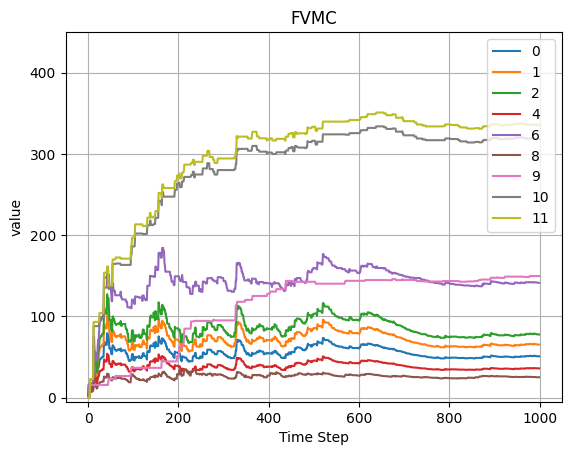

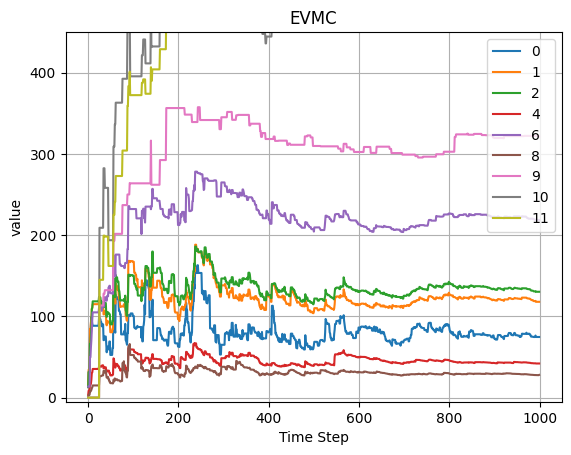

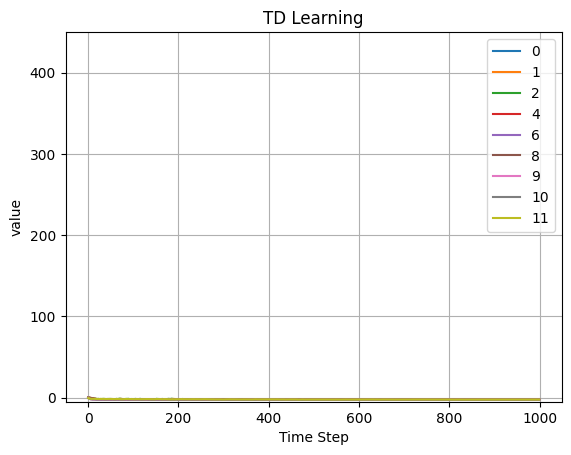

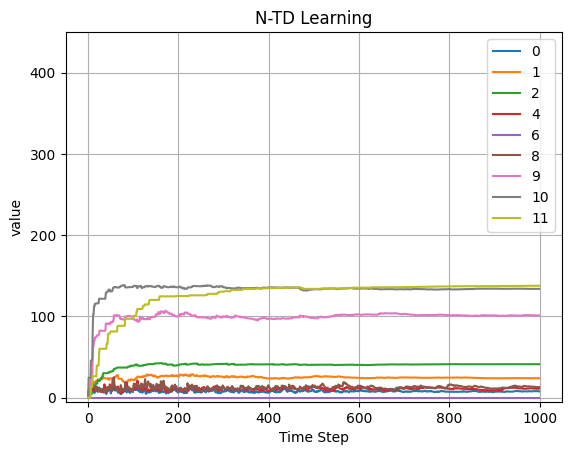

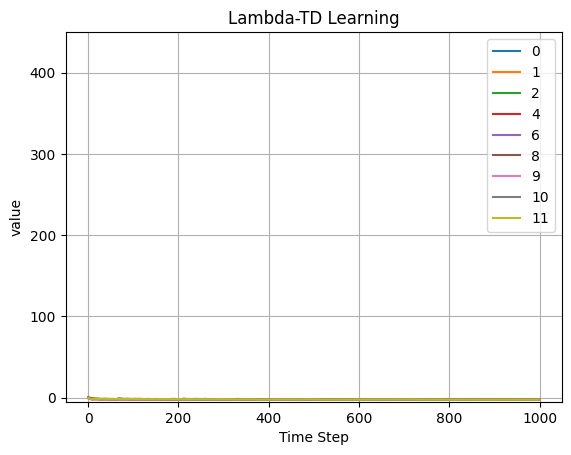

In [24]:
methods=["FVMC","EVMC","TD Learning","N-TD Learning","Lambda-TD Learning"]
value=[k,l,m,n,o]
for i in range(5):
  states_to_plot = [0, 1, 2, 4, 6, 8, 9, 10, 11]
  for state in states_to_plot:
      plt.plot(time_steps, value[i][state], label=str(state))



  plt.title(methods[i])
  plt.xlabel('Time Step')
  plt.ylabel('value')
  plt.legend(loc='upper right')
  plt.grid(True)

  plt.ylim(-5, 450)
  plt.show()

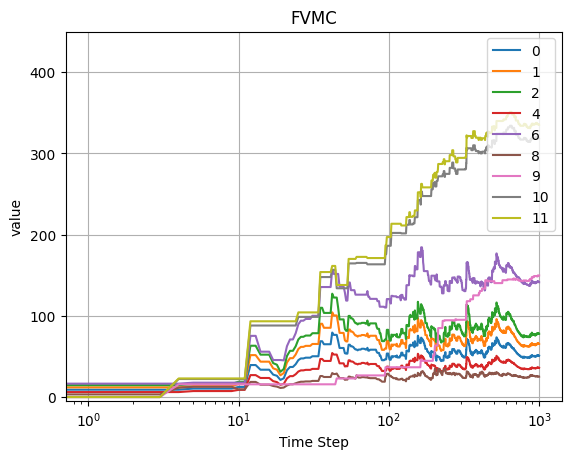

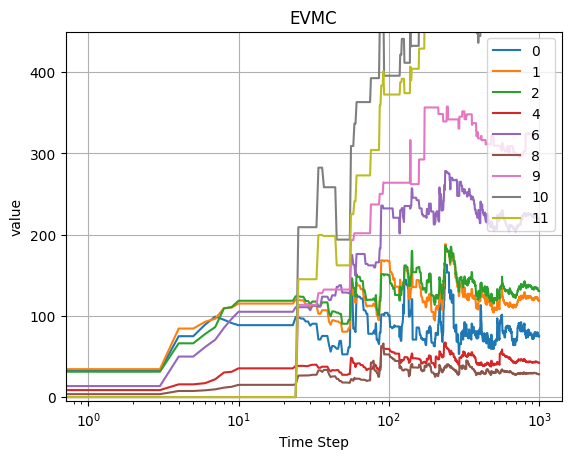

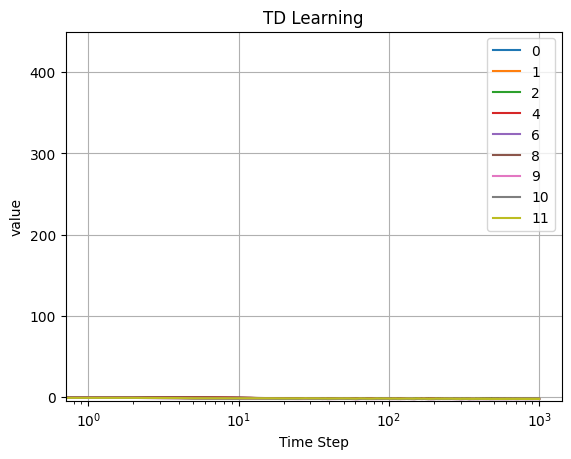

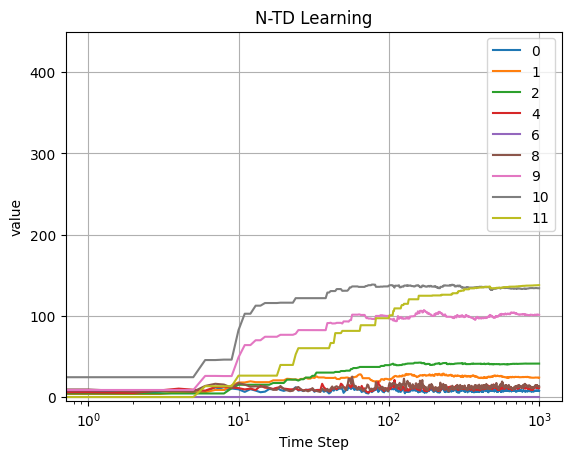

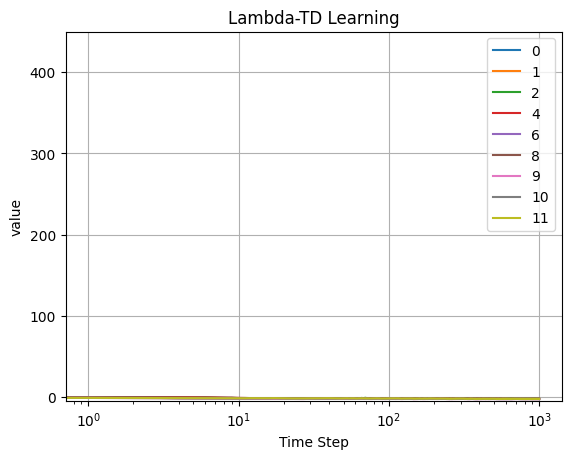

In [25]:
#14
time_steps = np.arange(1000)

methods=["FVMC","EVMC","TD Learning","N-TD Learning","Lambda-TD Learning"]
value=[k,l,m,n,o]
for i in range(5):
  states_to_plot = [0, 1, 2, 4, 6, 8, 9, 10, 11]
  for state in states_to_plot:
      plt.plot(time_steps, value[i][state], label=str(state))

  plt.title(methods[i])
  plt.xlabel('Time Step')
  plt.ylabel('value')
  plt.legend(loc='upper right')
  plt.grid(True)

  plt.ylim(-5, 450)
  plt.xscale('log')
  plt.show()

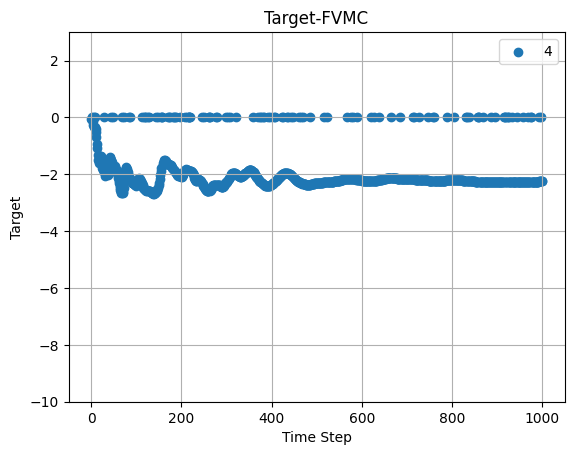

In [26]:
time_steps = np.arange(1000)


f=np.transpose(f)
h=np.transpose(h)
g=np.transpose(g)


plt.scatter(time_steps, g[4],label=4)

plt.title('Target-FVMC')
plt.xlabel('Time Step')
plt.ylabel('Target')
plt.legend()
plt.grid(True)

plt.ylim(-10, 3)

plt.show()

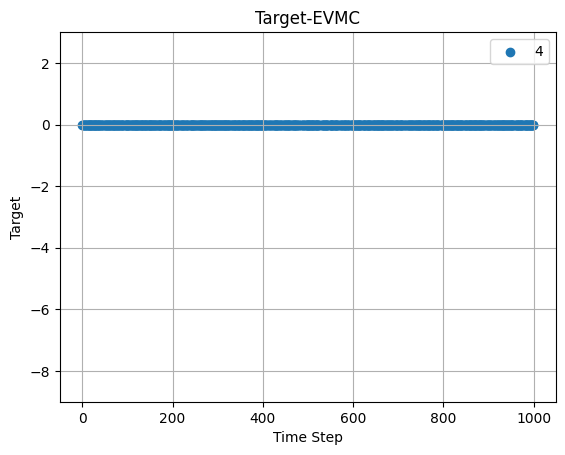

In [27]:

plt.scatter(time_steps, h[4],label=4)

plt.title('Target-EVMC')
plt.xlabel('Time Step')
plt.ylabel('Target')
plt.legend()
plt.grid(True)

plt.ylim(-9, 3)

plt.show()

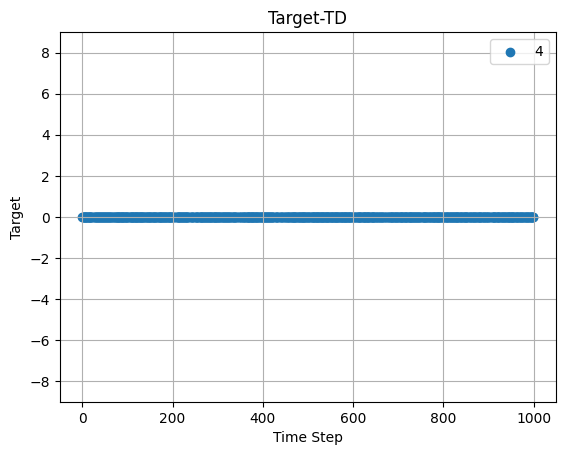

In [28]:
plt.scatter(time_steps, f[4],label=4)

plt.title('Target-TD')
plt.xlabel('Time Step')
plt.ylabel('Target')
plt.legend()
plt.grid(True)

plt.ylim(-9, 9)

plt.show()